In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scienceplots
plt.style.use('science')

In [15]:
import spin_models as spin

In [16]:
from astropy import constants as const
from astropy import units as u
solar_mass_kg = const.M_sun.value

In [17]:
df_binary = pd.read_csv("Data/binary-merger-data.csv",index_col= False)
df_binary.head()

,M1,M2,t_merger,Merger,Type
0,2.261179e+09,1.629006e+09,8.587741e+08,Yes,iso
1,1.614773e+09,1.077349e+09,8.934006e+08,Yes,iso
2,6.554858e+09,1.175723e+09,4.120229e+09,Yes,iso
3,7.039616e+09,6.263608e+09,8.933714e+10,No,iso
4,1.179139e+10,3.306548e+09,1.421714e+10,No,iso


In [21]:
df_iso_bbh = df_binary[(df_binary["Type"] == "iso") & (df_binary["Merger"] == "Yes")]

In [24]:
M1 = df_iso_bbh["M1"].to_numpy()
M2 = df_iso_bbh["M2"].to_numpy()

In [25]:
def find_q(M1,M2):
    if (M2>M1):
        q = M1/M2
    else:
        q = M2/M1
    
    return q

In [36]:
def kick_vel_for_a_spin_model(model,M1,M2,angle_arg_ret = "No"):

    a1 = []
    theta1 = []
    a2 = []
    theta2 = []
    recoil = []

    for i in range(len(M1)):

        S1,S2 = model()
        a1.append(np.linalg.norm(S1))
        a2.append(np.linalg.norm(S2))

        theta1.append(np.arccos(S1[2]/np.linalg.norm(S1)))
        theta2.append(np.arccos(S2[2]/np.linalg.norm(S2)))
        
        q_i = find_q(M1[i],M2[i])
        Vk = spin.gw_kick(q_i,S1,S2)

        recoil.append(np.linalg.norm(Vk))

    if angle_arg_ret == "Yes":
        return recoil,a1,theta1,theta2,recoil
    else:
        return recoil

In [41]:
V_rh = kick_vel_for_a_spin_model(spin.random_high,M1,M2,angle_arg_ret = "No")
V_rd = kick_vel_for_a_spin_model(spin.random_dry,M1,M2,angle_arg_ret = "No")
V_hot = kick_vel_for_a_spin_model(spin.hot,M1,M2,angle_arg_ret = "No")
V_cold = kick_vel_for_a_spin_model(spin.cold,M1,M2,angle_arg_ret = "No")
V_deg5 = kick_vel_for_a_spin_model(spin.deg5_high,M1,M2,angle_arg_ret = "No")

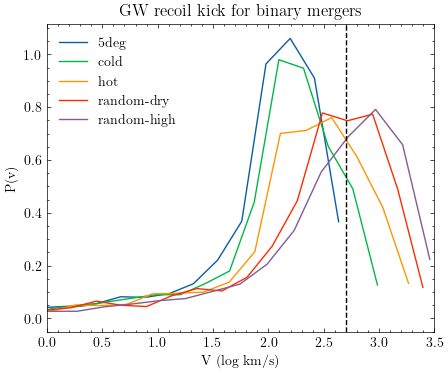

In [61]:
plt.figure(figsize=[5,4])

bin_heights, bin_borders = np.histogram(np.log10(V_deg5),bins=30,density=True)
bin_centers = bin_borders[:-1] + np.diff(bin_borders) / 2
plt.plot(bin_centers,bin_heights,label="5deg")

bin_heights, bin_borders = np.histogram(np.log10(V_cold),bins=30,density=True)
bin_centers = bin_borders[:-1] + np.diff(bin_borders) / 2
plt.plot(bin_centers,bin_heights,label="cold")

bin_heights, bin_borders = np.histogram(np.log10(V_hot),bins=30,density=True)
bin_centers = bin_borders[:-1] + np.diff(bin_borders) / 2
plt.plot(bin_centers,bin_heights,label="hot")

bin_heights, bin_borders = np.histogram(np.log10(V_rd),bins=30,density=True)
bin_centers = bin_borders[:-1] + np.diff(bin_borders) / 2
plt.plot(bin_centers,bin_heights,label="random-dry")

bin_heights, bin_borders = np.histogram(np.log10(V_rh),bins=30,density=True)
bin_centers = bin_borders[:-1] + np.diff(bin_borders) / 2
plt.plot(bin_centers,bin_heights,label="random-high")

plt.xlim(0,3.5)
#plt.ylim(0.2)
plt.legend()
plt.xlabel("V (log km/s)")
plt.ylabel("P(v)")
plt.axvline(x = np.log10(500),color = "k",linestyle = "--")
plt.title("GW recoil kick for binary mergers")
plt.savefig("Figures/Velocity-kicks.pdf")

In [103]:
#random_high 
S1_rh = []
S2_rh = []
a1_rh = []
a2_rh = []
theta1_rh = []
theta2_rh = []
theta12_rh = []
recoil_rh = []

for i in range(N_bbh):

    S1,S2 = spin.random_high()
    S1_rh.append(S1)
    S2_rh.append(S2)
    a1_rh.append(np.linalg.norm(S1))
    a2_rh.append(np.linalg.norm(S2))

    theta1 = np.arccos(S1[2]/np.linalg.norm(S1))
    theta1_rh.append(theta1)
    theta2 = np.arccos(S2[2]/np.linalg.norm(S2))
    theta2_rh.append(theta2)
    theta12_rh.append(np.dot(S1,S2)/(np.linalg.norm(S1)*np.linalg.norm(S2)))
    
    q_i = find_q(bbhs.iloc[i]["M1"],bbhs.iloc[i]["M2"])
    Vk = spin.gw_kick(q_i,S1,S2)

    recoil_rh.append(np.linalg.norm(Vk))

(array([234., 221., 256., 237., 218., 238., 233., 249., 254., 230.]),
 array([-5.72956658e+01, -4.58434772e+01, -3.43912886e+01, -2.29391000e+01,
        -1.14869114e+01, -3.47227633e-02,  1.14174658e+01,  2.28696544e+01,
         3.43218431e+01,  4.57740317e+01,  5.72262203e+01]),
 <BarContainer object of 10 artists>)

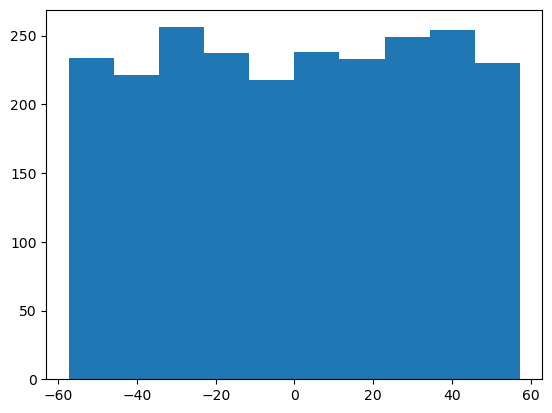

In [101]:
#mislaignment by dot product 

plt.hist(theta12_rh)

(array([0.00035969, 0.00146645, 0.0030574 , 0.00549225, 0.0065575 ,
        0.00643299, 0.00504955, 0.0030159 , 0.00114825, 0.00020752]),
 array([-150.79515138, -120.29572445,  -89.79629752,  -59.29687059,
         -28.79744366,    1.70198327,   32.2014102 ,   62.70083713,
          93.20026406,  123.69969099,  154.19911792]),
 <BarContainer object of 10 artists>)

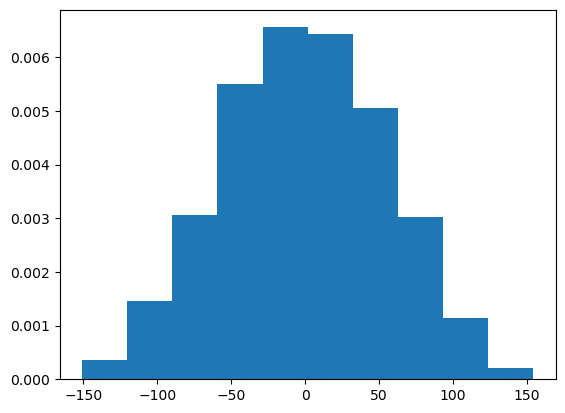

In [100]:
theta1_rh = np.array(theta1_rh)* 180/np.pi
theta2_rh = np.array(theta2_rh)* 180/np.pi
plt.hist(theta1_rh - theta2_rh,density=True)

(array([0.00184066, 0.00431102, 0.00644232, 0.00762906, 0.00842829,
        0.00854939, 0.00821032, 0.00612747, 0.00433524, 0.00152581]),
 array([  3.78883274,  21.21055907,  38.6322854 ,  56.05401172,
         73.47573805,  90.89746437, 108.3191907 , 125.74091703,
        143.16264335, 160.58436968, 178.006096  ]),
 <BarContainer object of 10 artists>)

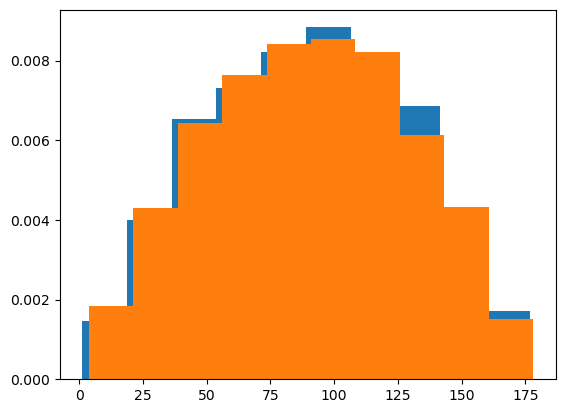

In [102]:
plt.hist(theta1_rh,density=True)
plt.hist(theta2_rh,density=True)

(array([  2.,   3.,   3.,  25.,  35.,  64., 128., 300., 891., 919.]),
 array([-3.49104132, -2.78445064, -2.07785997, -1.3712693 , -0.66467863,
         0.04191205,  0.74850272,  1.45509339,  2.16168407,  2.86827474,
         3.57486541]),
 <BarContainer object of 10 artists>)

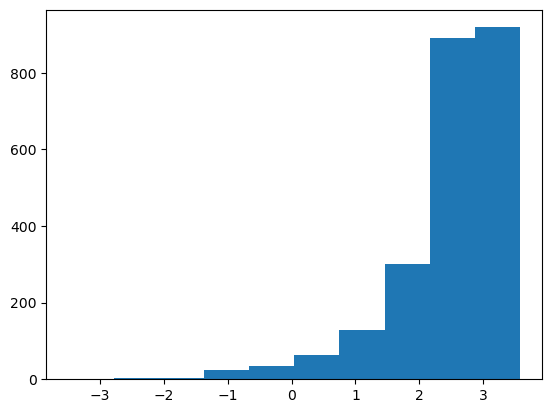

In [126]:
plt.hist(np.log10(recoil_rh))

In [127]:
#random_dry 
a1_rd = []
a2_rd = []
theta1_rd = []
theta2_rd = []
theta12_rd = []
recoil_rd = []

for i in range(N_bbh):

    S1,S2 = spin.random_dry()
    S1_rh.append(S1)
    S2_rh.append(S2)
    a1_rh.append(np.linalg.norm(S1))
    a2_rh.append(np.linalg.norm(S2))

    theta1 = np.arccos(S1[2]/np.linalg.norm(S1))
    theta1_rd.append(theta1)
    theta2 = np.arccos(S2[2]/np.linalg.norm(S2))
    theta2_rd.append(theta2)
    theta12_rd.append(np.dot(S1,S2)/(np.linalg.norm(S1)*np.linalg.norm(S2)))
    
    q_i = find_q(bbhs.iloc[i]["M1"],bbhs.iloc[i]["M2"])
    Vk = spin.gw_kick(q_i,S1,S2)

    recoil_rd.append(np.linalg.norm(Vk))


(array([5.77197278e-04, 1.73159183e-03, 2.88598639e-03, 8.65795916e-03,
        1.73159183e-02, 4.38669931e-02, 6.63776869e-02, 1.50071292e-01,
        6.02016761e-01, 4.74456162e-01]),
 array([-3.82326607, -3.09224924, -2.3612324 , -1.63021556, -0.89919873,
        -0.16818189,  0.56283495,  1.29385179,  2.02486862,  2.75588546,
         3.4869023 ]),
 <BarContainer object of 10 artists>)

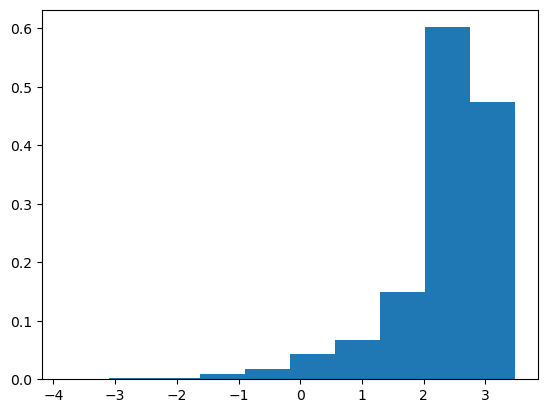

In [138]:
plt.hist(np.log10(recoil_rd),density=True)

In [139]:
#hot
a1_hot = []
a2_hot = []
theta1_hot = []
theta2_hot = []
theta12_hot = []
recoil_hot = []

for i in range(N_bbh):

    S1,S2 = spin.hot()
    S1_rh.append(S1)
    S2_rh.append(S2)
    a1_rh.append(np.linalg.norm(S1))
    a2_rh.append(np.linalg.norm(S2))

    theta1 = np.arccos(S1[2]/np.linalg.norm(S1))
    theta1_hot.append(theta1)
    theta2 = np.arccos(S2[2]/np.linalg.norm(S2))
    theta2_hot.append(theta2)
    theta12_hot.append(np.dot(S1,S2)/(np.linalg.norm(S1)*np.linalg.norm(S2)))
    
    q_i = find_q(bbhs.iloc[i]["M1"],bbhs.iloc[i]["M2"])
    Vk = spin.gw_kick(q_i,S1,S2)

    recoil_hot.append(np.linalg.norm(Vk))

(array([0.00112149, 0.00112149, 0.00168224, 0.0072897 , 0.01794388,
        0.0364485 , 0.07626148, 0.17383132, 0.66336275, 0.34990563]),
 array([-4.06927641, -3.31681312, -2.56434983, -1.81188654, -1.05942325,
        -0.30695996,  0.44550334,  1.19796663,  1.95042992,  2.70289321,
         3.4553565 ]),
 <BarContainer object of 10 artists>)

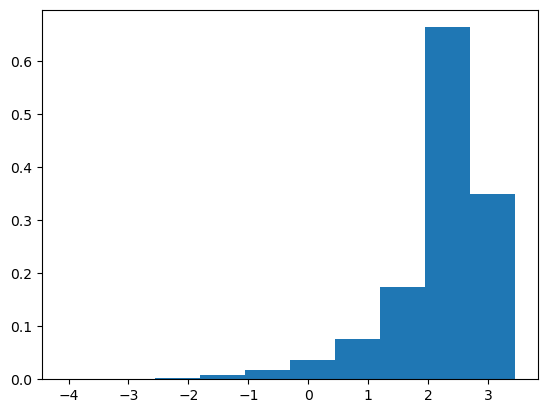

In [144]:

plt.hist(np.log10(recoil_hot),density=True)

In [145]:
#cold
a1_cold = []
a2_cold = []
theta1_cold = []
theta2_cold = []
theta12_cold = []
recoil_cold = []

for i in range(N_bbh):

    S1,S2 = spin.cold()
    S1_rh.append(S1)
    S2_rh.append(S2)
    a1_rh.append(np.linalg.norm(S1))
    a2_rh.append(np.linalg.norm(S2))

    theta1 = np.arccos(S1[2]/np.linalg.norm(S1))
    theta1_cold.append(theta1)
    theta2 = np.arccos(S2[2]/np.linalg.norm(S2))
    theta2_cold.append(theta2)
    theta12_cold.append(np.dot(S1,S2)/(np.linalg.norm(S1)*np.linalg.norm(S2)))
    
    q_i = find_q(bbhs.iloc[i]["M1"],bbhs.iloc[i]["M2"])
    Vk = spin.gw_kick(q_i,S1,S2)

    recoil_cold.append(np.linalg.norm(Vk))

(array([0.00112149, 0.00112149, 0.00168224, 0.0072897 , 0.01794388,
        0.0364485 , 0.07626148, 0.17383132, 0.66336275, 0.34990563]),
 array([-4.06927641, -3.31681312, -2.56434983, -1.81188654, -1.05942325,
        -0.30695996,  0.44550334,  1.19796663,  1.95042992,  2.70289321,
         3.4553565 ]),
 <BarContainer object of 10 artists>)

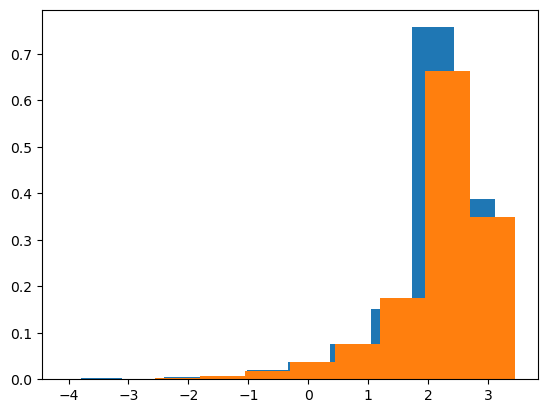

In [150]:
plt.hist(np.log10(recoil_cold),density=True)
plt.hist(np.log10(recoil_hot),density=True)

In [230]:
#5deg
a1_5deg = []
a2_5deg = []
theta1_5deg = []
theta2_5deg = []
theta12_5deg = []
recoil_5deg = []

for i in range(N_bbh):

    S1,S2 = spin.deg5_high()

    a1_5deg.append(np.linalg.norm(S1))
    a2_5deg.append(np.linalg.norm(S2))

    theta1 = np.arccos(S1[2]/np.linalg.norm(S1))
    theta1_5deg.append(theta1)
    theta2 = np.arccos(S2[2]/np.linalg.norm(S2))
    theta2_5deg.append(theta2)
    theta12_5deg.append(np.dot(S1,S2)/(np.linalg.norm(S1)*np.linalg.norm(S2)))
    
    q_i = find_q(bbhs.iloc[i]["M1"],bbhs.iloc[i]["M2"])
    Vk = spin.gw_kick(q_i,S1,S2)

    recoil_5deg.append(np.linalg.norm(Vk))

(array([0.00259386, 0.00129693, 0.00129693, 0.00129693, 0.00129693,
        0.00778159, 0.00129693, 0.01426625, 0.01556318, 0.01815705,
        0.03112636, 0.04409568, 0.06744046, 0.0609558 , 0.10505148,
        0.15303796, 0.30088819, 0.84819344, 1.01030993, 0.38778263]),
 array([-3.72014749, -3.39480972, -3.06947194, -2.74413417, -2.41879639,
        -2.09345862, -1.76812084, -1.44278307, -1.11744529, -0.79210752,
        -0.46676974, -0.14143197,  0.18390581,  0.50924358,  0.83458136,
         1.15991913,  1.48525691,  1.81059468,  2.13593246,  2.46127023,
         2.78660801]),
 <BarContainer object of 20 artists>)

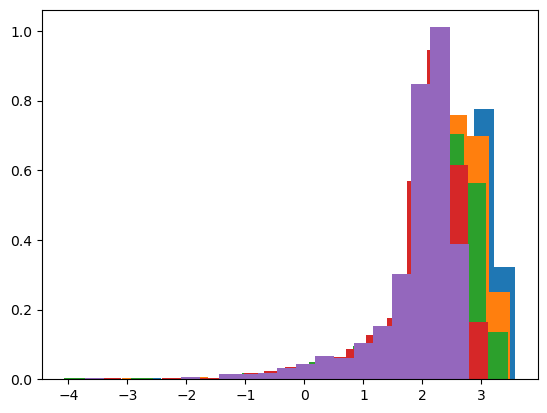

In [217]:

plt.hist(np.log10(recoil_rh),bins=20,density=True)
plt.hist(np.log10(recoil_rd),bins=20,density=True)

plt.hist(np.log10(recoil_hot),bins=20,density=True)
plt.hist(np.log10(recoil_cold),bins=20,density=True)

plt.hist(np.log10(recoil_5deg),bins=20,density=True)

In [218]:
from scipy.optimize import curve_fit

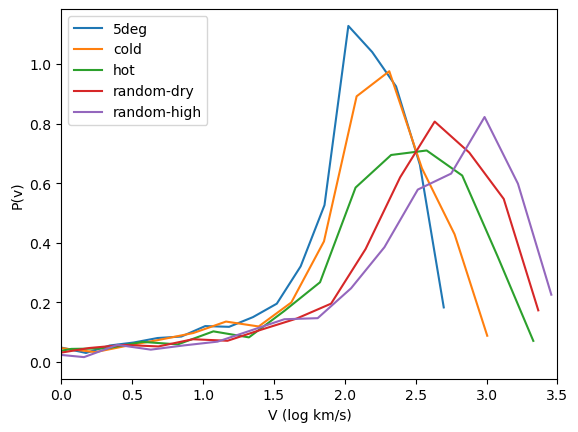

In [238]:
bin_heights, bin_borders = np.histogram(np.log10(recoil_5deg),bins=40,density=True)
bin_centers = bin_borders[:-1] + np.diff(bin_borders) / 2
plt.plot(bin_centers,bin_heights,label="5deg")

bin_heights, bin_borders = np.histogram(np.log10(recoil_cold),bins=30,density=True)
bin_centers = bin_borders[:-1] + np.diff(bin_borders) / 2
plt.plot(bin_centers,bin_heights,label="cold")

bin_heights, bin_borders = np.histogram(np.log10(recoil_hot),bins=30,density=True)
bin_centers = bin_borders[:-1] + np.diff(bin_borders) / 2
plt.plot(bin_centers,bin_heights,label="hot")

bin_heights, bin_borders = np.histogram(np.log10(recoil_rd),bins=30,density=True)
bin_centers = bin_borders[:-1] + np.diff(bin_borders) / 2
plt.plot(bin_centers,bin_heights,label="random-dry")

bin_heights, bin_borders = np.histogram(np.log10(recoil_rh),bins=30,density=True)
bin_centers = bin_borders[:-1] + np.diff(bin_borders) / 2
plt.plot(bin_centers,bin_heights,label="random-high")

plt.xlim(0,3.5)
#plt.ylim(0.2)
plt.legend()
plt.xlabel("V (log km/s)")
plt.ylabel("P(v)")
plt.savefig("Figures/Velocity-kicks.pdf")